 Importar libreria

In [35]:
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
import numpy as np
import datetime
import pandas as pd
from dasquakes import *
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from libcomcat.search import search
from libcomcat.dataframes import get_summary_data_frame
import matplotlib.dates as mdates

# Load Data

In [39]:
cable = 'whidbey'
print(format(cable))
record_length = 10 #minutes
t0 = datetime.datetime(2022, 5, 17, 1, 57, 0)
#(year, month, day, hour, min, sec, microsecond)


whidbey


In [41]:
print(t0)

2022-05-17 01:57:00


In [44]:
data_wrangler??

In [45]:
open_sintela_file??

In [46]:
prefix, network_name, datastore = data_wrangler(cable,record_length,t0)
data,dates,attrs = open_sintela_file(prefix,
                                     t0,
                                     datastore,
                                     number_of_files=record_length,
                                     verbose=True)
dx = attrs['SpatialSamplingInterval']
x_max=data.shape[1] * dx
print(data.shape)
print(data_wrangler)

/data/data5/Converted/whidbey_2022-05-17_01-57*.h5
/data/data5/Converted/whidbey_2022-05-17_01-58*.h5
/data/data5/Converted/whidbey_2022-05-17_01-59*.h5
/data/data5/Converted/whidbey_2022-05-17_02-00*.h5
/data/data5/Converted/whidbey_2022-05-17_02-01*.h5
/data/data5/Converted/whidbey_2022-05-17_02-02*.h5
/data/data5/Converted/whidbey_2022-05-17_02-03*.h5
/data/data5/Converted/whidbey_2022-05-17_02-04*.h5
/data/data5/Converted/whidbey_2022-05-17_02-05*.h5
/data/data5/Converted/whidbey_2022-05-17_02-06*.h5
(60000, 1720)
<function data_wrangler at 0x7f0208c42d30>


In [47]:
data[0, :]

array([-14.770239  ,   0.07142075,   0.16983041, ...,   1.251369  ,
        -0.21297391,   0.16488981], dtype=float32)

In [48]:
data[:, 0]

array([ -14.770239,  -14.693206,  -14.636318, ..., -251.65387 ,
       -251.66522 , -251.62883 ], dtype=float32)

In [51]:
mdates.date2num??

In [63]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [64]:
for ii in range(30):
    print(ii)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [65]:
lista = ['manzanas', 'naranjas', 'platanos', 'duraznos']
for fruta in lista:
    print (fruta)

manzanas
naranjas
platanos
duraznos


In [66]:
for ii, fruta in enumerate(lista):
    print (ii, fruta)

0 manzanas
1 naranjas
2 platanos
3 duraznos


In [49]:
date_format = mdates.DateFormatter('%H:%M:%S')
x_lims = mdates.date2num(dates)
print(date_format)
print(x_lims)

[19129.08125    19129.08125011 19129.08125023 ... 19129.08819409
 19129.08819421 19129.08819432]


In [28]:
print(open_sintela_file)

<function open_sintela_file at 0x7f0550e98af0>


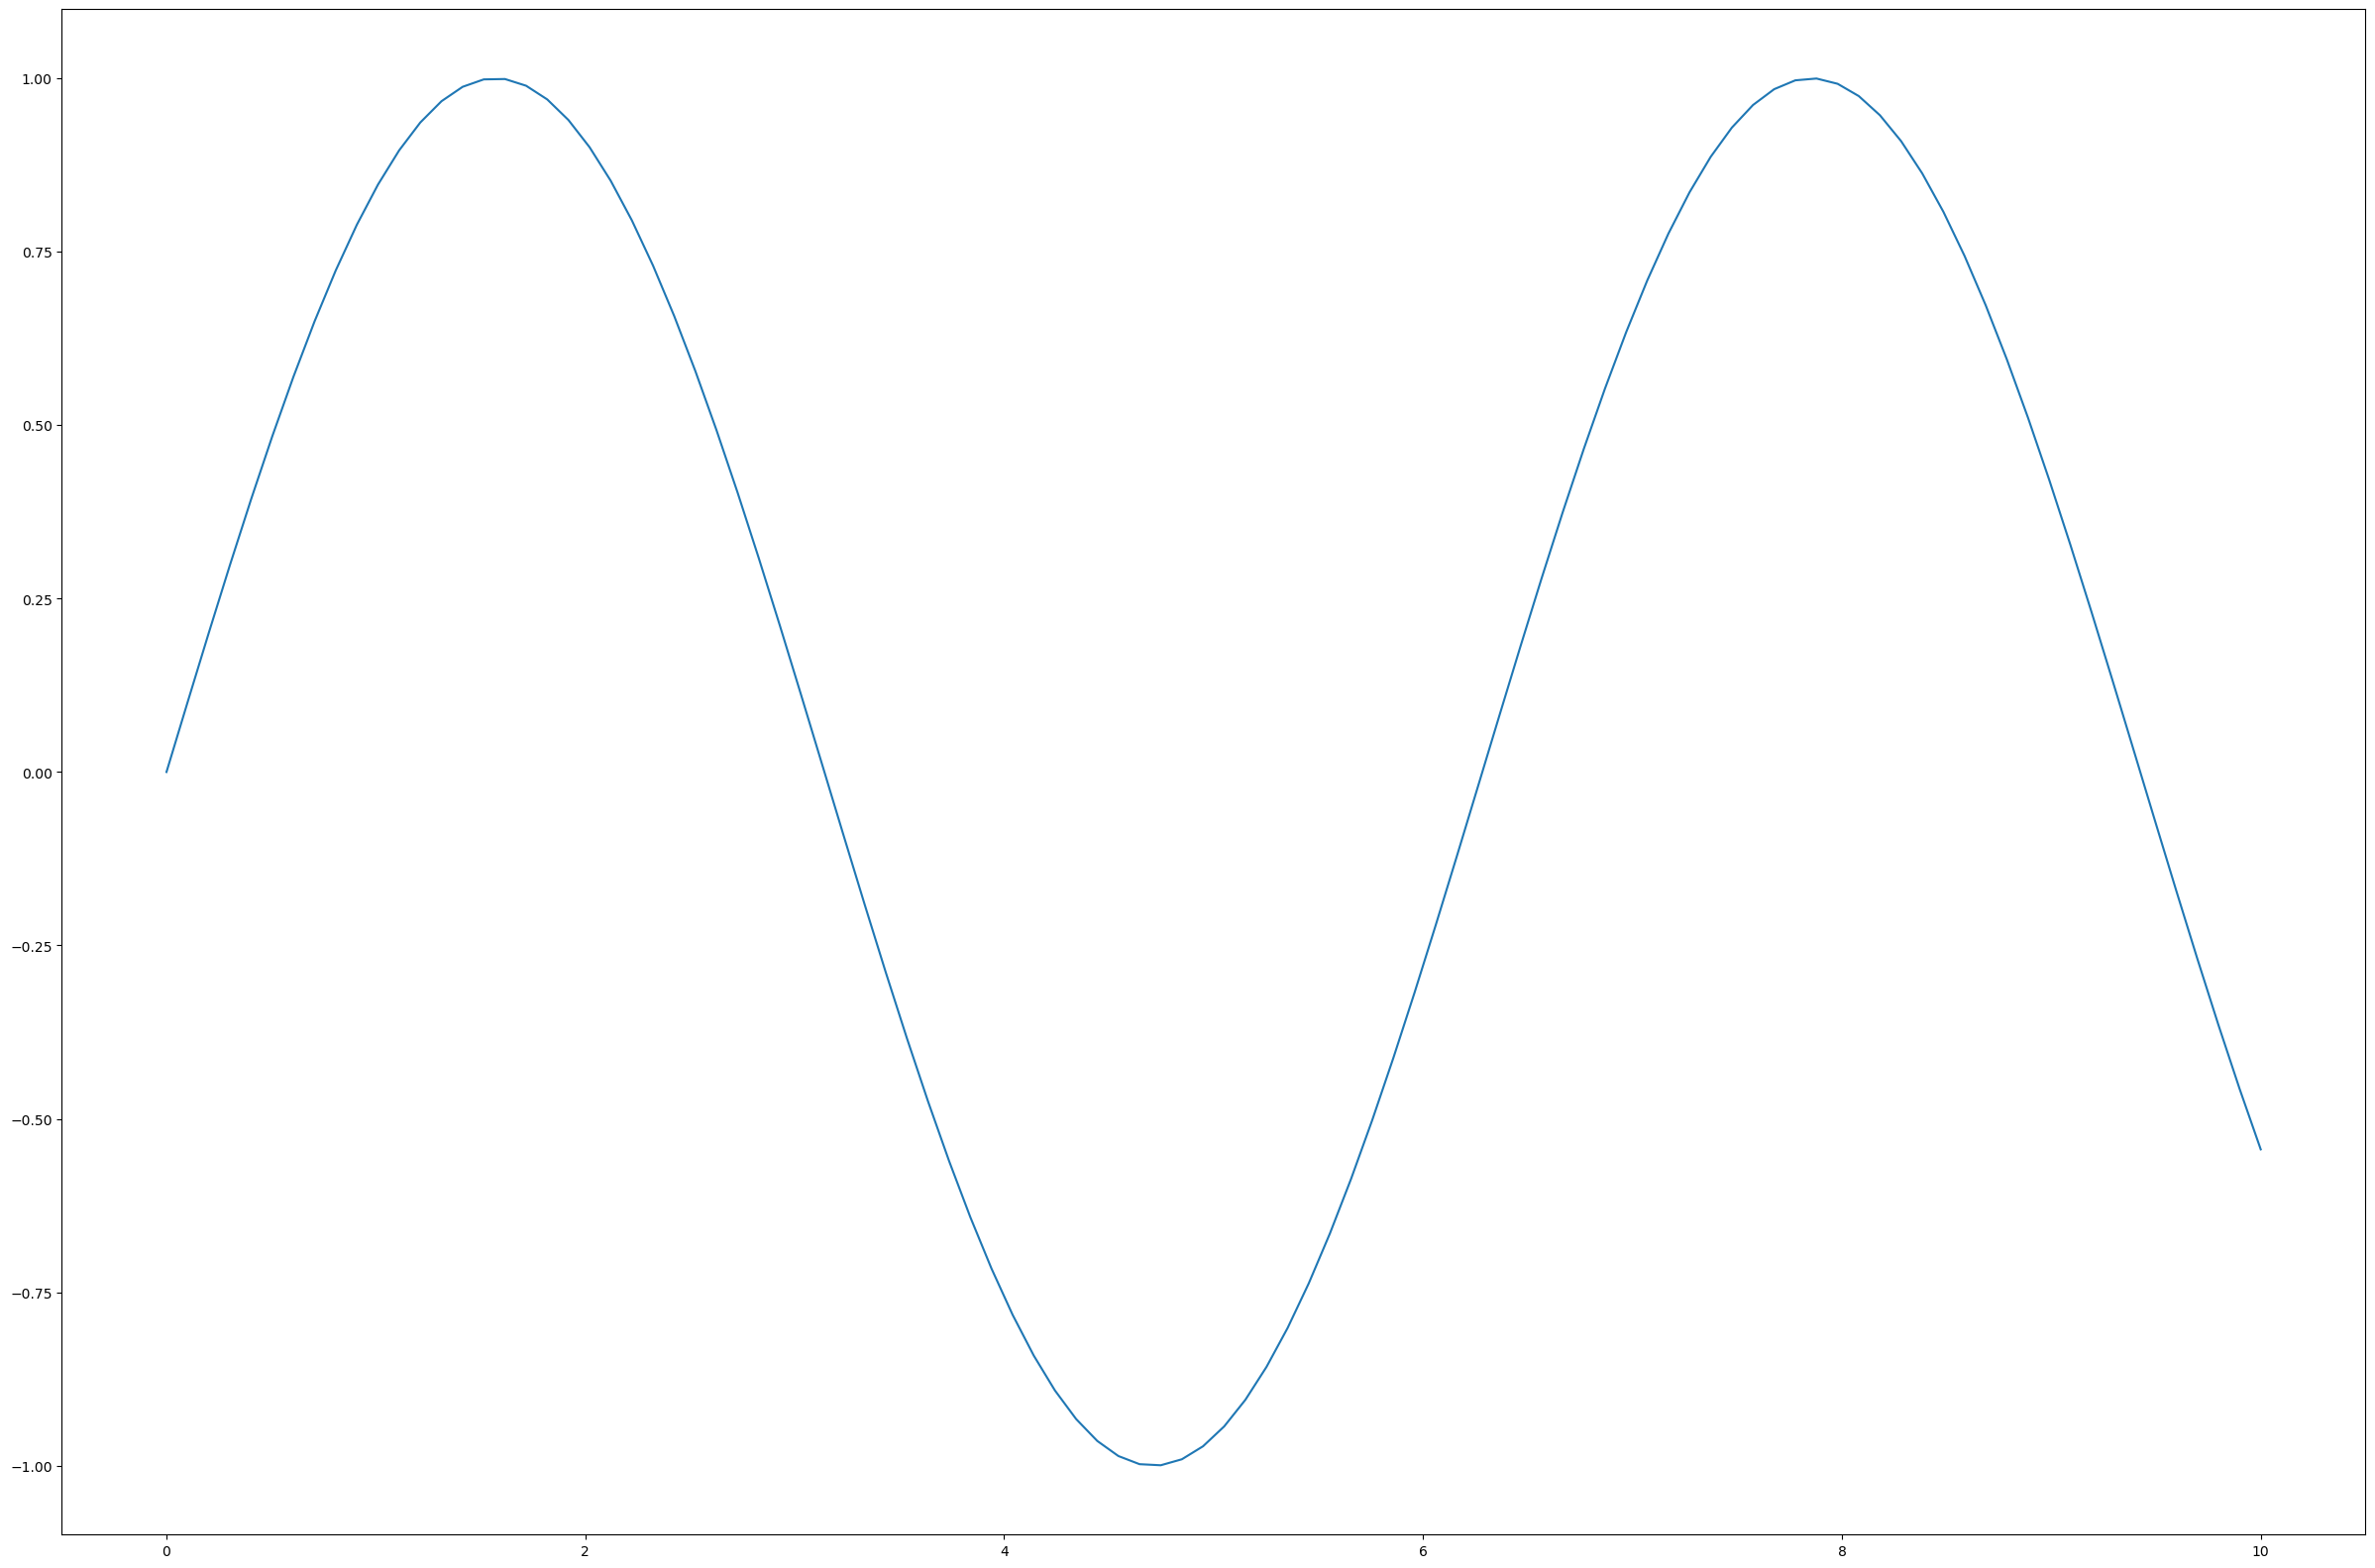

In [55]:
x = np.linspace(0, 10, num=100)
y = np.sin(x)

fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(x, y)
plt.show()

/tmp/ipykernel_2700652/1012598998.py:3: RuntimeWarning: divide by zero encountered in log
  y2 = np.log(x)


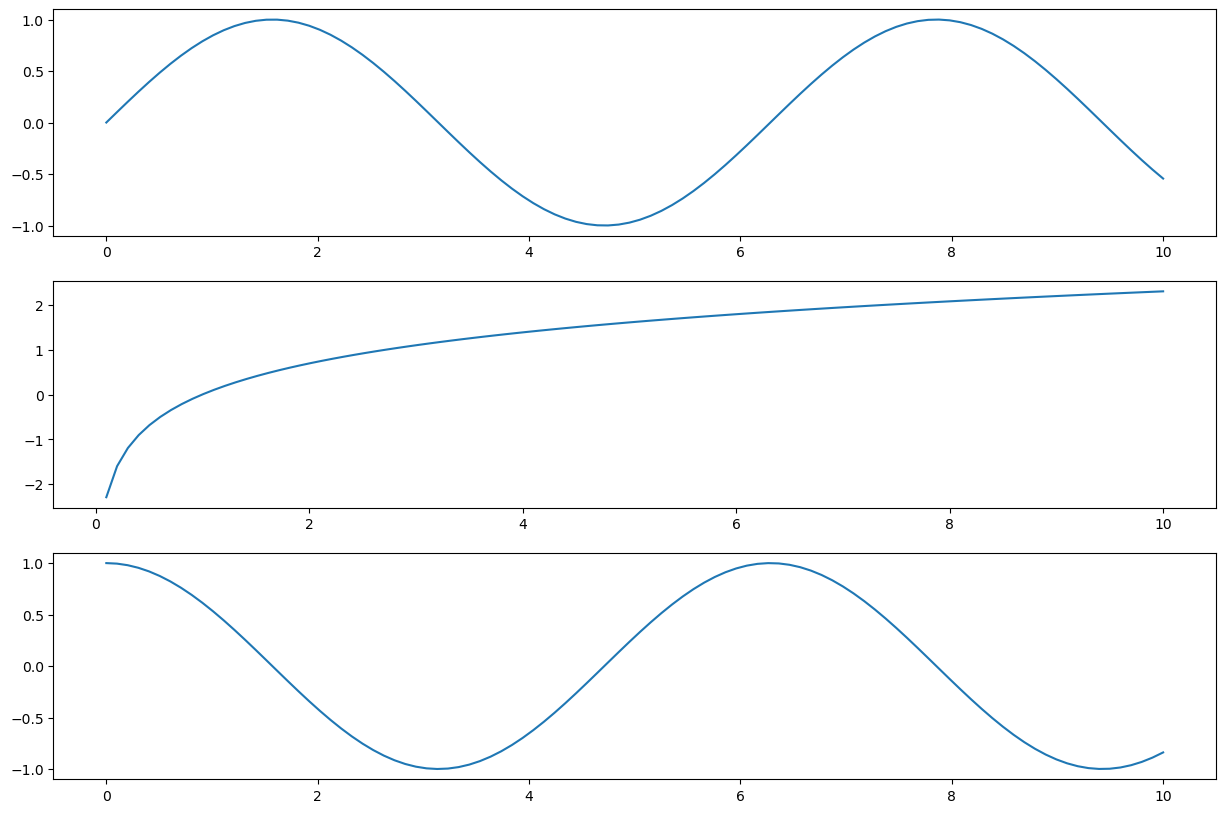

In [62]:
x = np.linspace(0, 10, num=100)
y = np.sin(x)
y2 = np.log(x)
y3=np.cos(x)

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
ax[0].plot(x, y)
ax[1].plot(x, y2)
ax[2].plot(x, y3)
plt.show()


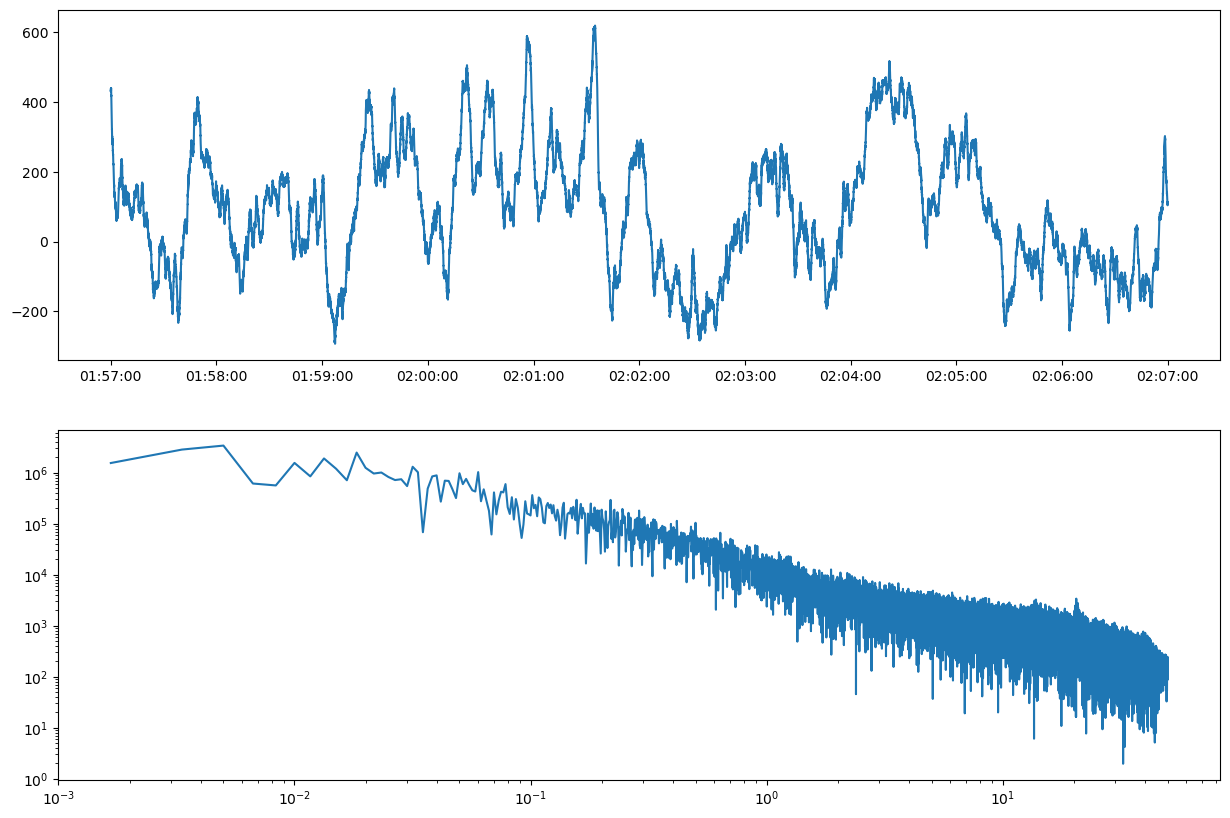

In [57]:
from scipy.signal import detrend
from numpy.fft import fft,fft2,fftfreq,fftshift

fig,ax=plt.subplots(2,1,figsize=(15,10))
ax=plt.subplot(211)
plt.plot(x_lims,np.sum(data,axis=1))
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()

plt.subplot(212)
f = fftfreq(data.shape[0],0.01)
ft = np.abs(fft(np.sum(data,axis=1)))
plt.loglog(f[f>0],ft[f>0])
#plt.plot(f[f>0],ft[f>0])
#plt.plot(max(f>0))

In [ ]:
#definir una función
def plot_filtered_data(low_cut,hi_cut,das_vmax=0.1):
    #b,a son los outputs de butter
    b,a = butter(2,(low_cut,hi_cut),'bp',fs=attrs['MaximumFrequency']*2)
    # data_filt = filtfilt(b,a,data[:,1200:1650],axis=0)
    data_filt = filtfilt(b,a,data,axis=0)

    fig,ax=plt.subplots(figsize=(12,12))


    # Subplot: DAS Data

    plt.imshow(data_filt.T,vmin=-das_vmax,vmax=das_vmax,
               cmap='seismic',aspect='auto', 
               extent=[x_lims[0],x_lims[-1],0,x_max])
    ax.xaxis.set_major_formatter(date_format)
    ax.xaxis_date()
    # plt.ylim([0, 4000])
    plt.grid()
    plt.title(f'Filter {low_cut}-{hi_cut} Hz')
    plt.show()
    
plot_filtered_data(1,8)
plot_filtered_data(0.2,1,das_vmax=1)
plot_filtered_data(0.05,0.2,das_vmax=1)

In [33]:
# Entire subsea region:
# x1 = 1225
# x2 = 1600

# Whidbey half of subsea region:
# x1 = 1225
# x2 = 1412

# Camano half of subsea region:
x1 = 1412
x2 = 1600

xmax = 1720

subsea_data = detrend(data[:,x1:x2])

ft = fftshift(fft2(subsea_data))
f = fftshift(fftfreq(subsea_data.shape[0], d=0.01))
k = fftshift(fftfreq(subsea_data.shape[1], d=attrs['SpatialSamplingInterval']))

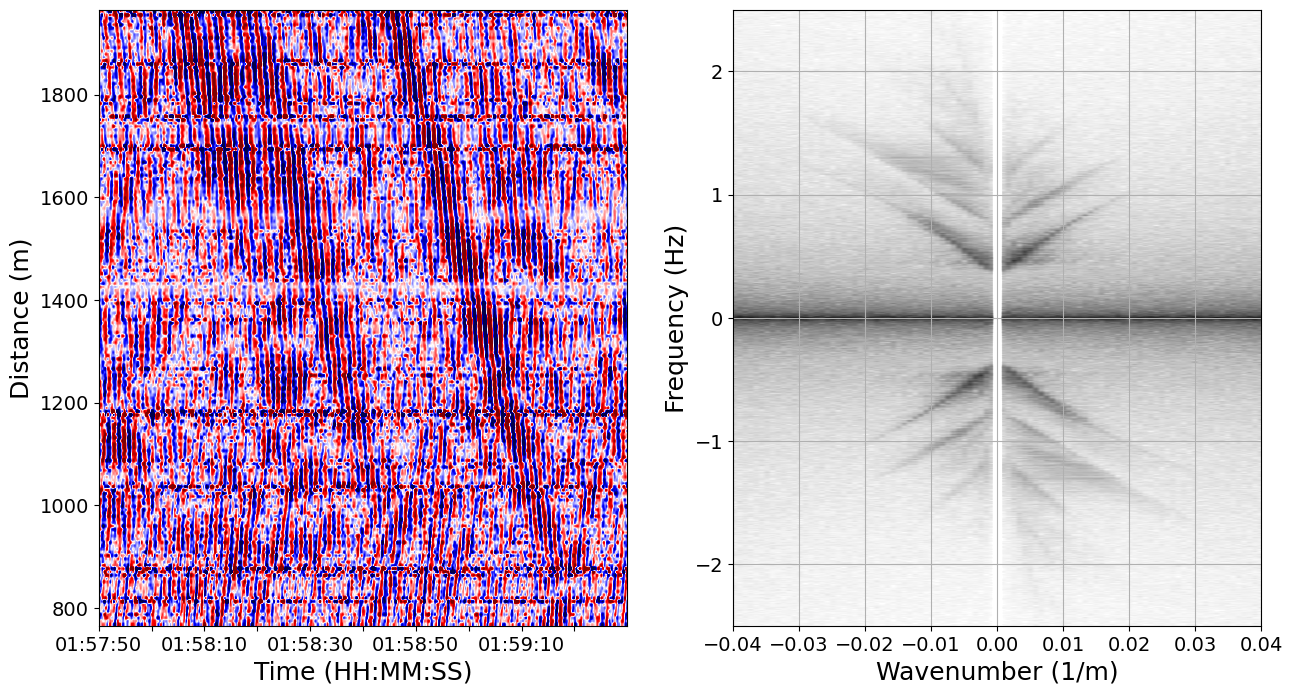

In [34]:
plt.subplots(1,2,figsize=(15,8))
das_vmax=1


low_cut = 0.2
hi_cut = 2

b,a = butter(2,(low_cut,hi_cut),'bp',fs=attrs['MaximumFrequency']*2)
subsea_data_filt = filtfilt(b,a,subsea_data,axis=0)


ax=plt.subplot(121)
ax.imshow(subsea_data_filt.T,vmin=-das_vmax,vmax=das_vmax,
           cmap='seismic',aspect='auto', 
           extent=[x_lims[0],x_lims[-1],(xmax-x2)*dx,(xmax-x1)*dx])
ax.xaxis.set_major_formatter(date_format)
ax.xaxis_date()
ax.set_xlim(x_lims[5000],x_lims[15000])
for i, tick in enumerate(ax.xaxis.get_ticklabels()):
    if i % 2 != 0:
        tick.set_visible(False)
        
ax.set_ylabel('Distance (m)',fontsize=18)
ax.set_xlabel('Time (HH:MM:SS)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)


        
ax=plt.subplot(122)
c = ax.imshow(np.log10(np.abs(ft)),
               aspect='auto',cmap='Greys',
               vmin=3,vmax=6,
               extent=[k[0],k[-1],f[0],f[-1]])

# omega = np.sqrt(g*k * np.tanh(k*h))
# plt.plot(k,omega)

# kappa = np.sqrt(1 + np.tan(45 * np.pi/180)**2 ) * k
# omega = np.sqrt(g*kappa * np.tanh(kappa*h))
# plt.plot(k,omega)

# kappa = np.sqrt(k**2 + 0.01**2)
# omega = np.sqrt(g*kappa * np.tanh(kappa*h))
# plt.plot(k,omega)


ax.set_ylabel('Frequency (Hz)',fontsize=18)
ax.set_xlabel('Wavenumber (1/m)',fontsize=18)
ax.set_ylim([-2.5,2.5])
# ax.legend()
# plt.ylim([0])
ax.set_xlim([-0.04,0.04])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.colorbar(c)
plt.grid()
plt.show()